## DecisionTree
* 의사 결정 나무(decision tree)는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형
* 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있기 때문에 CART(Classification And Regression Tree)라고도 한다.
* Scikit-Learn에서 의사 결정 나무는 DecisionTreeClassifier 클래스로 구현

https://datascienceschool.net/view-notebook/16c28c8c192147bfb3d4059474209e0a/

https://www.youtube.com/user/TheEasyoung/videos

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [3]:
data = pd.read_csv('Diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
sel_names = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure']

* **아래에서 x는 독립변수, y는 종속변수이다.**
* **독립변수는 종속변수에 영향을 준다. 즉, 독립변수의 값에 따라서 종속변수의 값이 달라지게 된다.**

In [0]:
x = data[sel_names]
y = data['Outcome']

In [13]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

* **아래를 보면 x와 y의 shape가 차원이 다르다. x는 2차원이지만 y는 1차원 구조를 가지고 있다. 따라서 차원을 맞춰줄 필요가 있다.**

In [17]:
x.values.shape, y.values.shape

((768, 6), (768,))

* **차원을 맞춰주기 위해서는 reshape를 사용한다.**
* **리스트의 -1, 즉 맨 끝에 위치한 리스트 값을 의미하는 것과 동일하다.**

In [0]:
# 차원 맞춰주기
x1 = x.values
y1 = y.values.reshape(-1, 1)

* **reshape로 차원을 맞춰주면 모두 2차원인 것을 확인할 수 있다.**

In [19]:
x1.shape, y1.shape

((768, 6), (768, 1))

* **xtrain (학습모델 독립변수), ytrain(학습모델 종속변수)**

* **xtest(시험모델 독립변수), ytest(시험모델 종속변수)**

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(x1, y1, test_size = 0.3, random_state=0)

In [24]:
# DecisionTree

dstClf = DecisionTreeClassifier()
dstClf.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
rResult = dstClf.predict(xtest)
rResult

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

* **시각화하기**

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import io

In [0]:
dot_data = io.StringIO()

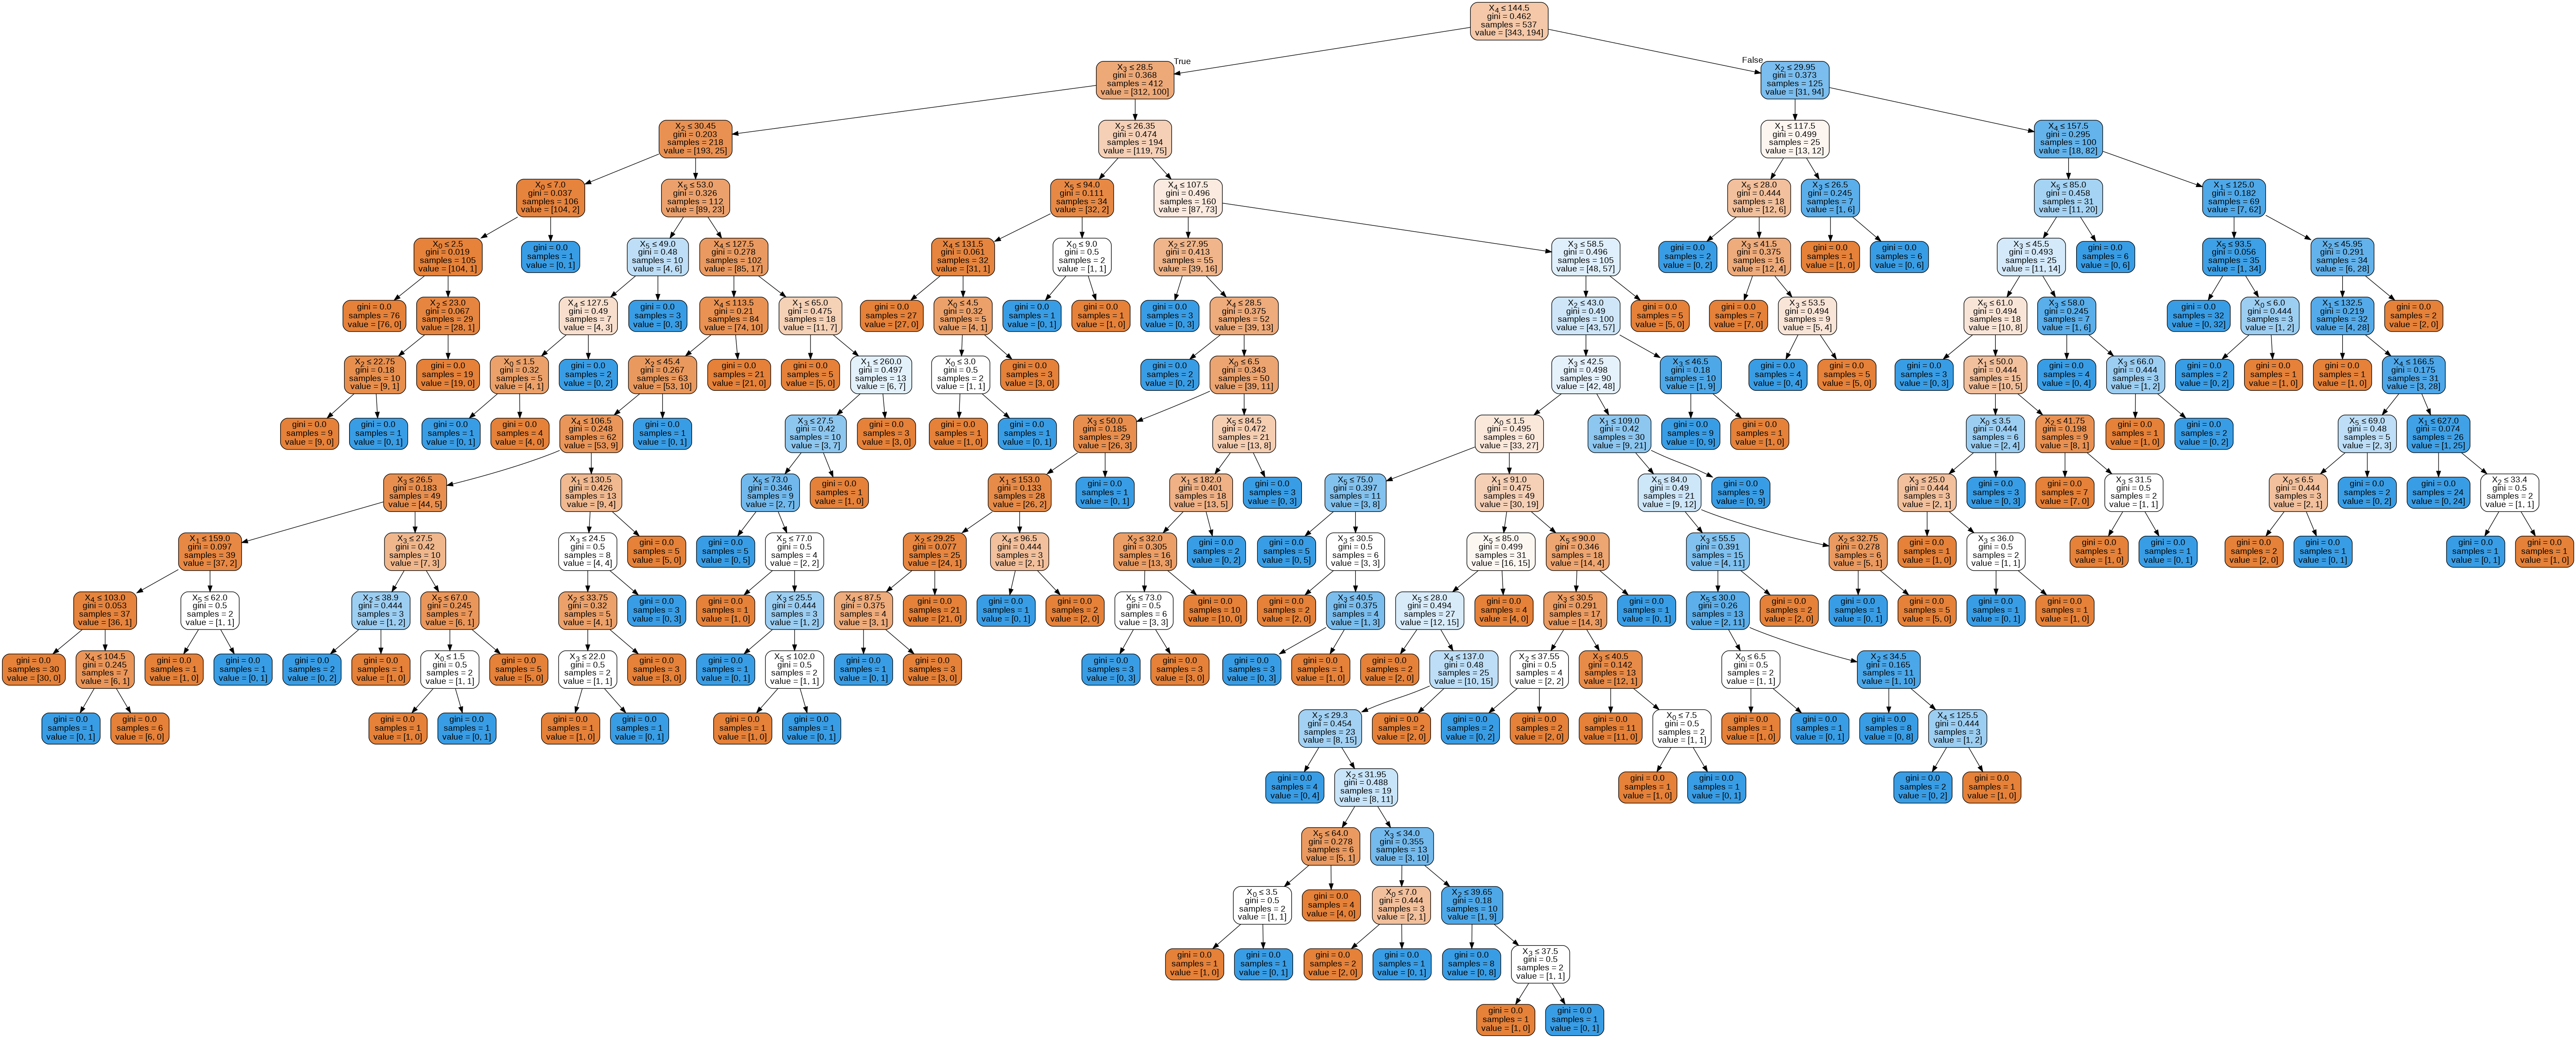

In [33]:
export_graphviz(dstClf, out_file = dot_data,
               filled = True, rounded = True,
               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())